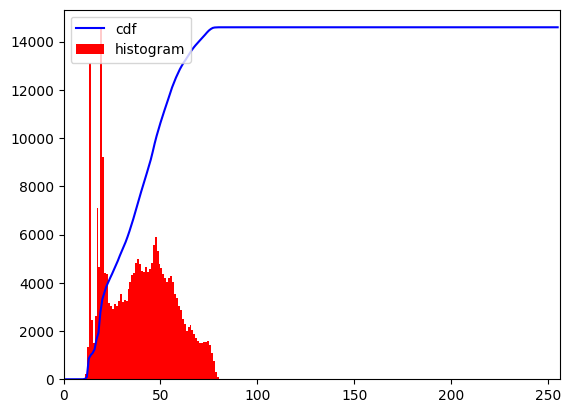

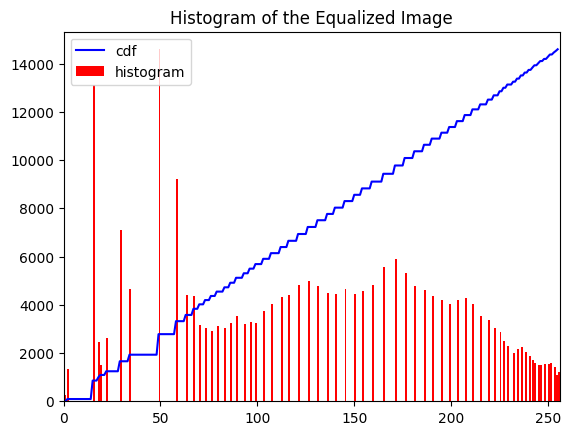

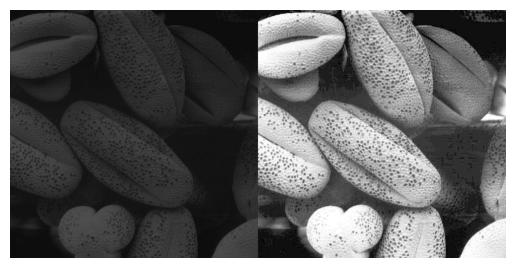

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('(5).jpg',cv2.IMREAD_GRAYSCALE)  
hist,bins = np.histogram(img.ravel(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
equ = cv2.equalizeHist(img)



hist,bins = np.histogram(equ.ravel(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title('Histogram of the Equalized Image')
plt.show()

res = np.hstack((img,equ)) #stacking images side-by-side
plt.axis('off')
plt.imshow(res, cmap='gray')

True

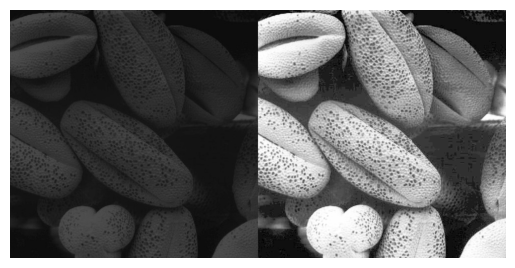

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('(5).jpg',cv2.IMREAD_GRAYSCALE)
#equalization without equalizeHist function
#calculate histogram
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[img]
#display img2
res = np.hstack((img,img2)) #stacking images side-by-side
plt.axis('off')
plt.imshow(res, cmap='gray')

#save img2 in Q5 folder
cv2.imwrite('Q5\img2.jpg',img2)

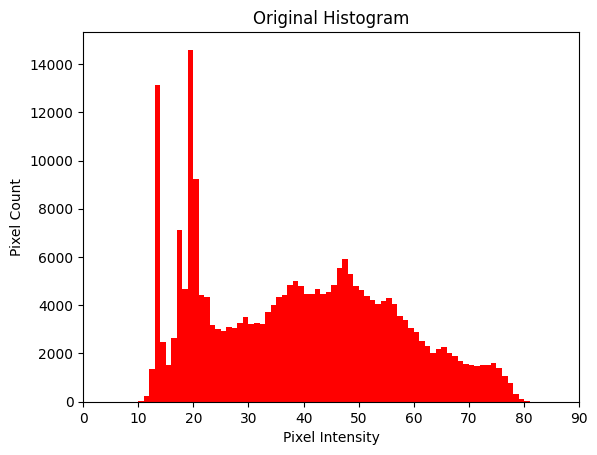

(500, 500)


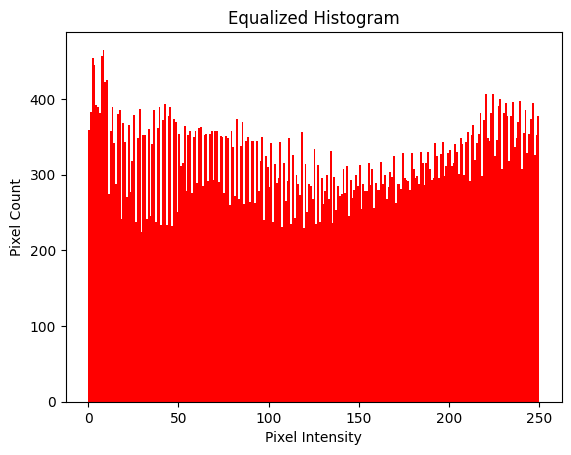

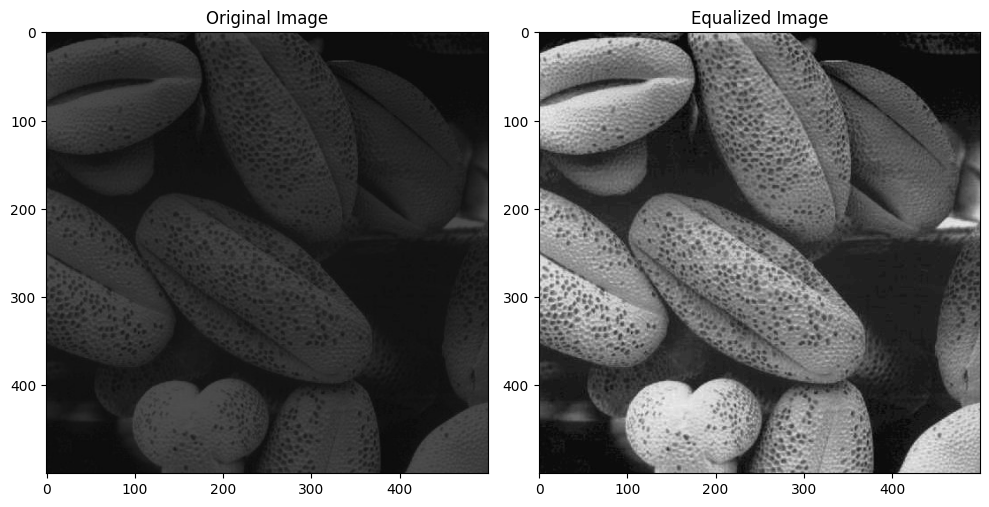

True

In [72]:
#my own function
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('(5).jpg',cv2.IMREAD_GRAYSCALE)
#plot histogram
plt.hist(image.flatten(),256,[0,256], color = 'r')
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Pixel Count')
#xaxis upto 80
plt.xlim([0,90])
plt.show()
print(image.shape)
L=np.sqrt(500)


#find the intensity levels for each pixels and store in an array
img_array1 = np.zeros((500,500))
for i in range(500):
    for j in range(500):
        img_array1[i][j]=image[i][j]




#find repective pdf for each element in img_array1
pdf = img_array1/(500*500)
#find cdf for each element in pdf
cdf = np.cumsum(img_array1)
#multiply each element in cdf by respective img_array element
cdf=(L-1)*cdf/(500*500)
#return the cdf array now by approximating it to nearest integer
result = np.around(cdf)
#hist,bins = np.histogram(cdf.ravel(),256,[0,256],color = 'r')
#plot cdf
plt.hist(cdf.flatten(),250,[0,250], color = 'r')
plt.title('Equalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Pixel Count')
plt.show()


#convert the above histogram into an image
img3=cdf[image]


plt.figure(figsize=(10, 5))
image0 = cv2.imread('(5).jpg')
plt.subplot(1, 2, 1)
plt.imshow(image0)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(img3, cmap='gray')
plt.title('Equalized Image')

plt.tight_layout()
plt.show()

#save img2 in Q5 folder
cv2.imwrite('Q5\img3.jpg',img2)


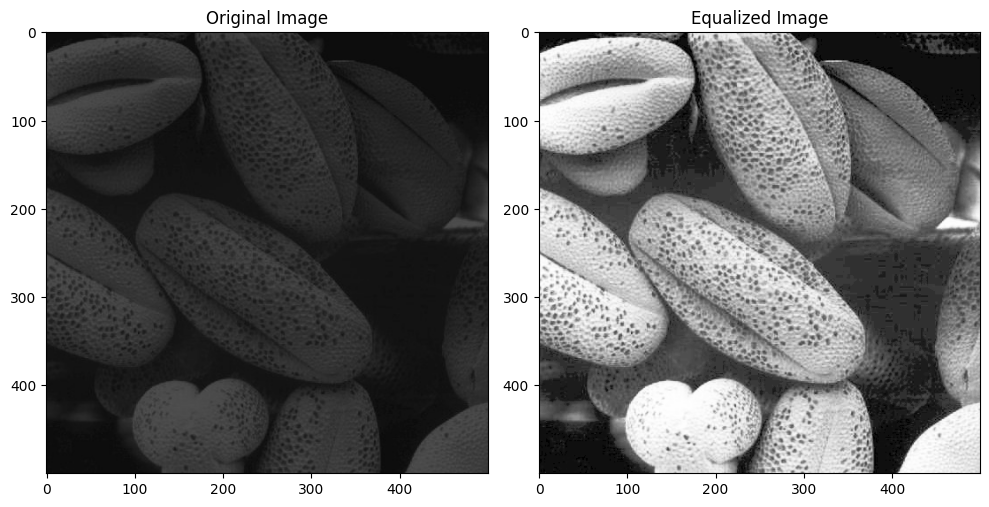

In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale

image = cv2.imread('(5).jpg')

# Flatten the image into a 1D array
img_array = image.flatten()

# Calculate the histogram
hist, _ = np.histogram(img_array, bins=256, range=[0, 256])

# Calculate the number of pixels for each intensity level
pixel_count = hist

# Calculate the probability density function (PDF)
pdf = pixel_count / np.sum(pixel_count)

# Calculate the cumulative distribution function (CDF)
cdf = pdf.cumsum()

# Multiply each CDF value by the maximum intensity level (255)
cdf_scaled = (cdf * 255).astype(int)

# Apply transforamation
equalized_img_array = cdf_scaled[image]

# Reshape the equalized image array to its original shape
equalized_img = equalized_img_array.reshape(image.shape)

# Plot the histogram of the equalized image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')

plt.tight_layout()
plt.show()
